# Data Challenge : Prediction of the energy consumption of buildings

## Description
Ce projet vise à prédire la consommation énergétique des bâtiments en fonction de leurs caractéristiques physiques et des conditions météorologiques externes. L'objectif est de fournir un outil qui peut aider à mieux comprendre et optimiser la consommation d'énergie dans le secteur du bâtiment.

## Contexte
Les bâtiments représentent une part importante de la consommation énergétique mondiale. Une meilleure compréhension et prédiction de la consommation énergétique peuvent contribuer à des bâtiments plus écoénergétiques et à la réduction de l'empreinte carbone.

## Données
Les données utilisées dans ce projet comprennent les caractéristiques des bâtiments (superficie, âge, type d'isolation, etc.) ainsi que des données météorologiques (température extérieure).



![Description de l'image](images/logo.webp)

## Import data 

In [1]:
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import roc_auc_score, accuracy_score


from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")
pd

/Users/amadoutraore/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


<module 'pandas' from '/Users/amadoutraore/anaconda3/lib/python3.11/site-packages/pandas/__init__.py'>

In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

train_data, test_data = train_data.drop(columns = ['Building_ID']), test_data.drop(columns = ['Building_ID'])

In [3]:
train_data.head()

,Surface,Age,Type,Heating_Type,Insulation_Level,Windows_Type,Outside_Temperature,Energy_Consumption
0,221,29,Industrial,Individual,Medium,Single,17.667586,281.468485
1,445,82,Industrial,Gas,Medium,Triple,0.963693,1083.189898
2,320,19,Industrial,Gas,High,Double,1.763513,671.082907
3,477,59,Commercial,Electric,Low,Double,20.837422,517.994559
4,150,88,Residential,Gas,High,Triple,1.438822,138.202098


In [4]:
train_data
categ_columns = ['Type', 'Heating_Type',
                            'Insulation_Level', 'Windows_Type']

In [5]:
train_data.head()

,Surface,Age,Type,Heating_Type,Insulation_Level,Windows_Type,Outside_Temperature,Energy_Consumption
0,221,29,Industrial,Individual,Medium,Single,17.667586,281.468485
1,445,82,Industrial,Gas,Medium,Triple,0.963693,1083.189898
2,320,19,Industrial,Gas,High,Double,1.763513,671.082907
3,477,59,Commercial,Electric,Low,Double,20.837422,517.994559
4,150,88,Residential,Gas,High,Triple,1.438822,138.202098


# Missing values

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Type                 8000 non-null   object 
 3   Heating_Type         8000 non-null   object 
 4   Insulation_Level     8000 non-null   object 
 5   Windows_Type         8000 non-null   object 
 6   Outside_Temperature  8000 non-null   float64
 7   Energy_Consumption   8000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 500.1+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Surface              2000 non-null   int64  
 1   Age                  2000 non-null   int64  
 2   Type                 2000 non-null   object 
 3   Heating_Type         2000 non-null   object 
 4   Insulation_Level     2000 non-null   object 
 5   Windows_Type         2000 non-null   object 
 6   Outside_Temperature  2000 non-null   float64
 7   Energy_Consumption   2000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 125.1+ KB


In [8]:
train_data.describe()

,Surface,Age,Outside_Temperature,Energy_Consumption
count,8000.000000,8000.000000,8000.000000,8000.000000
mean,273.647250,49.839625,12.459336,474.896045
std,129.288395,28.725386,10.124707,313.254691
min,50.000000,1.000000,-4.989858,28.000841
25%,161.000000,25.000000,3.656886,224.176594
50%,273.000000,50.000000,12.355945,397.770307
75%,385.000000,75.000000,21.181975,671.355987
max,499.000000,99.000000,29.984635,1493.303456


In [9]:
test_data.describe()

,Surface,Age,Outside_Temperature,Energy_Consumption
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,276.385000,49.942500,12.702721,478.112486
std,131.028978,28.479883,10.114449,314.901978
min,50.000000,1.000000,-4.965821,33.075271
25%,164.000000,26.000000,4.266711,225.505443
50%,270.000000,50.000000,12.760622,403.530801
75%,393.250000,75.000000,21.425043,671.457279
max,499.000000,99.000000,29.894868,1435.384784


In [10]:
print("Valeurs nulles dans train_data :")
print(train_data.isnull().sum())

print("\nValeurs nulles dans test_data :")
print(test_data.isnull().sum())


Valeurs nulles dans train_data :
Surface                0
Age                    0
Type                   0
Heating_Type           0
Insulation_Level       0
Windows_Type           0
Outside_Temperature    0
Energy_Consumption     0
dtype: int64

Valeurs nulles dans test_data :
Surface                0
Age                    0
Type                   0
Heating_Type           0
Insulation_Level       0
Windows_Type           0
Outside_Temperature    0
Energy_Consumption     0
dtype: int64


# EDA

In [11]:
def pie_chart_plot(feature):
#     title_is_train = 'train data'
#     df = train_data
    
#     if not train_mode:
#         df = test_data
#         title_is_train = 'test data'
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
    
    df_train = pd.DataFrame(train_data[feature].value_counts().reset_index())
    
    
    explode_lst_train = [0.1 for _ in range(df_train.shape[0])]
    
#     plt.figure(figsize = (15, 6))
    axes[0].pie(data=df_train, x='count', labels = feature, autopct='%1.0f%%', explode=explode_lst_train, startangle=90)
    axes[0].set_title(f'{feature} train_data')
    

    df_test = pd.DataFrame(test_data[feature].value_counts().reset_index())
    explode_lst_test = [0.1 for _ in range(df_test.shape[0])]
    axes[1].pie(data=df_test, x='count', labels = feature, autopct='%1.0f%%', explode=explode_lst_test, startangle=90)
    axes[1].set_title(f'{feature} test_data')
#     plt.legend()
    plt.show()

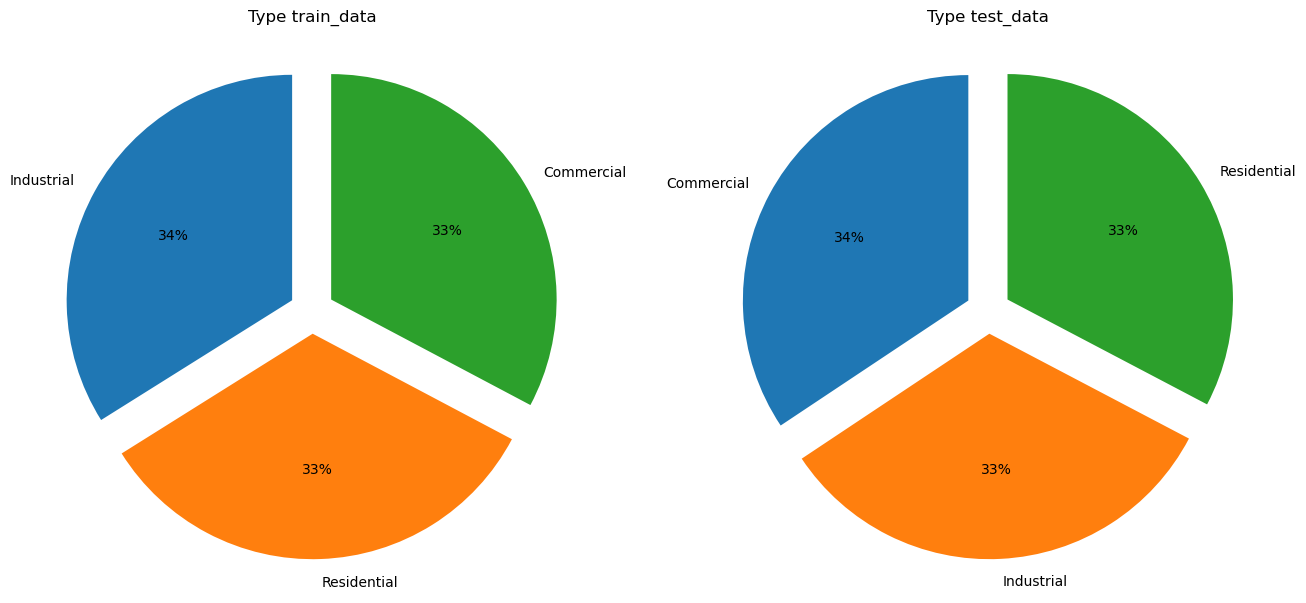

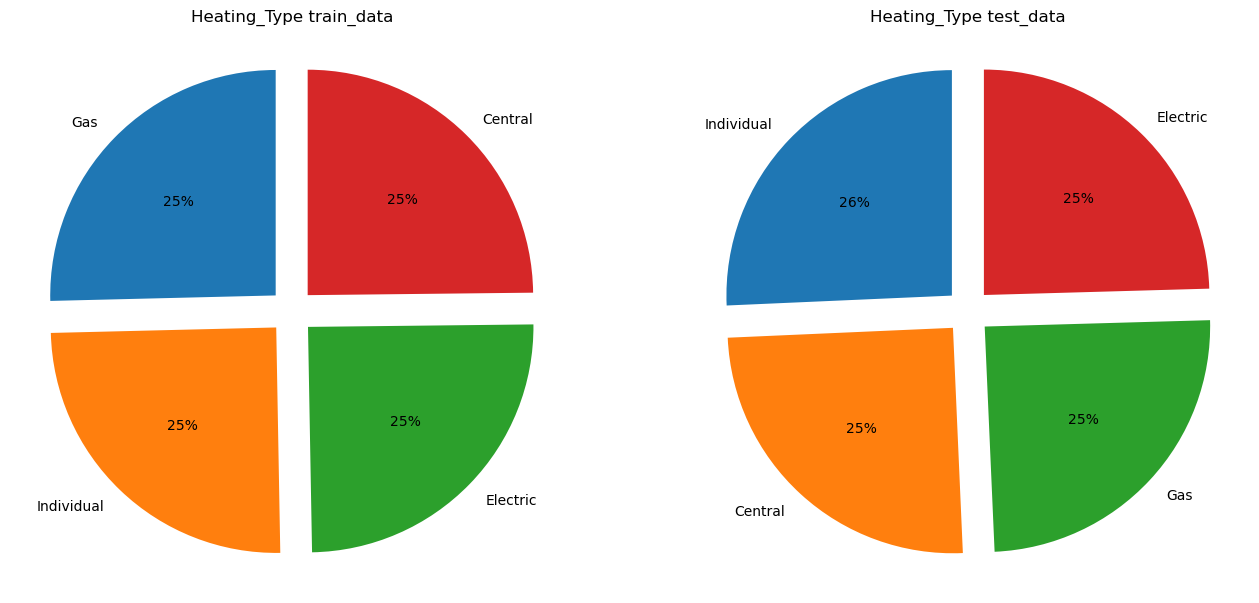

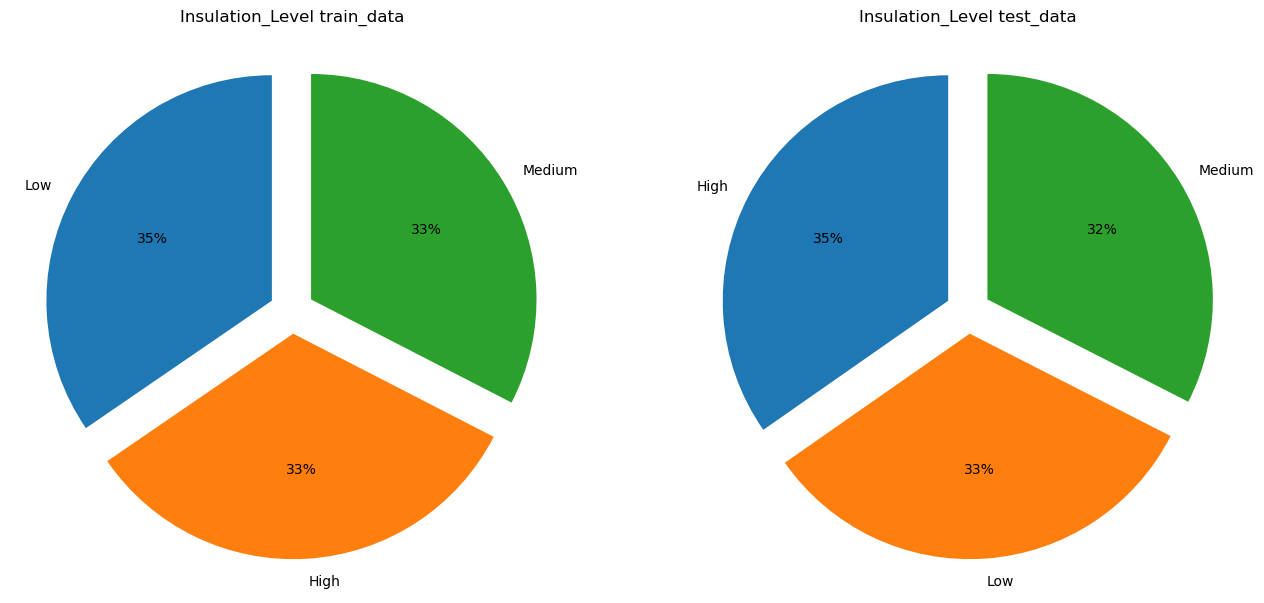

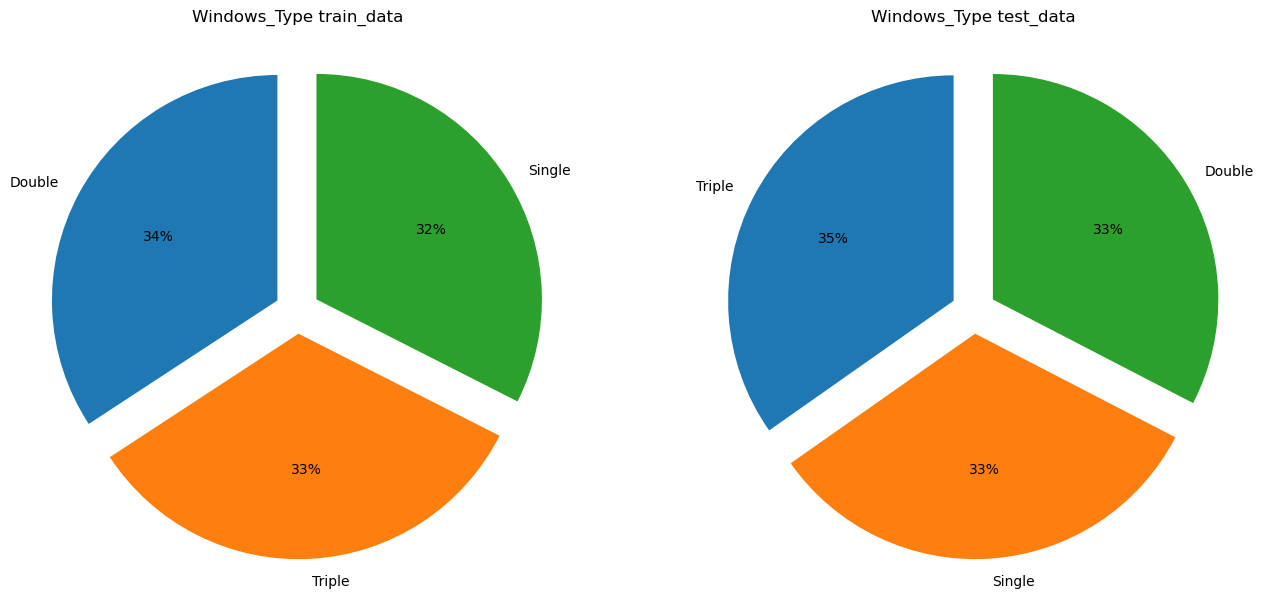

In [12]:
for col in categ_columns:
    pie_chart_plot(col)

## Hist plots

Let's plot a target distribution depending on categorical features

In [13]:
def show_hist_plot(feature):
    sns.set(rc={'figure.figsize':(12,6)})
    sns.histplot(binwidth=0.5, x='Energy_Consumption', hue=feature,
                 data=train_data, stat="count", multiple="stack")
    plt.title(f'target vs {feature}')
    plt.xticks(rotation=45)
    plt.show()

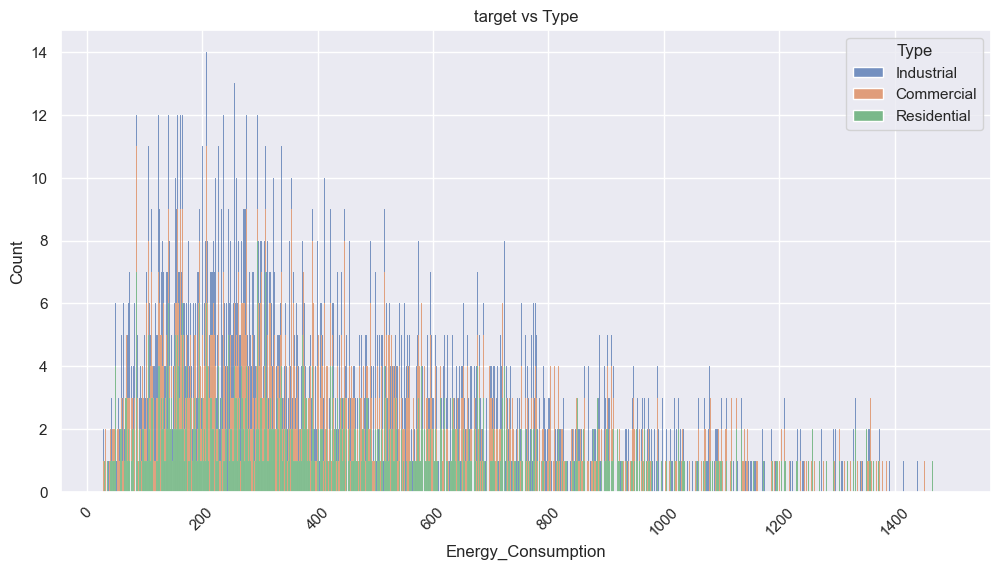

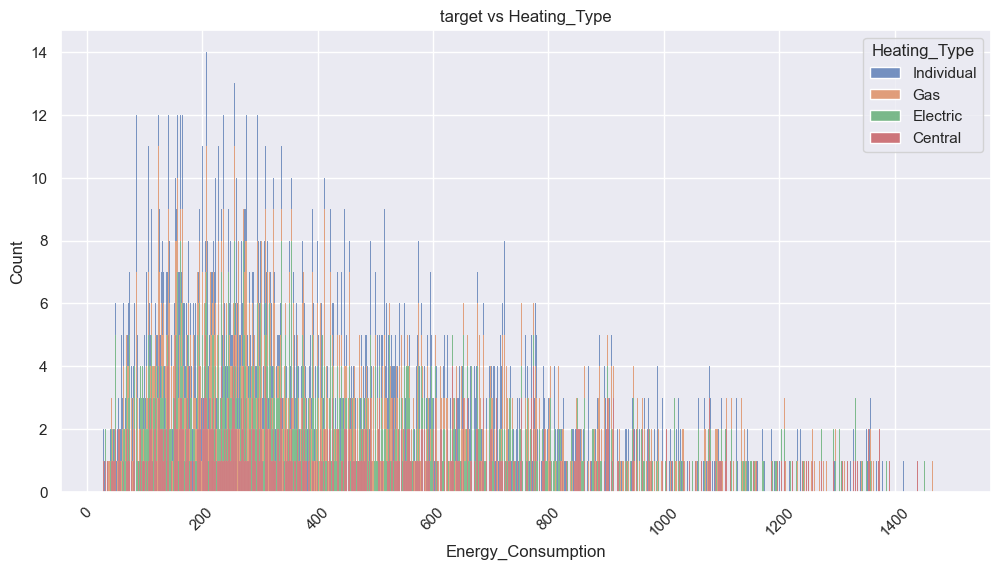

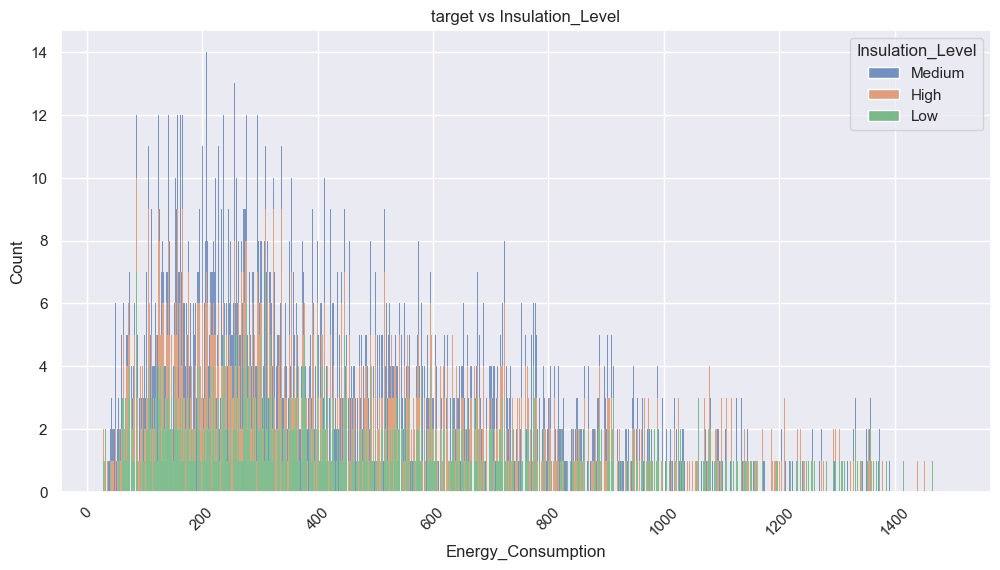

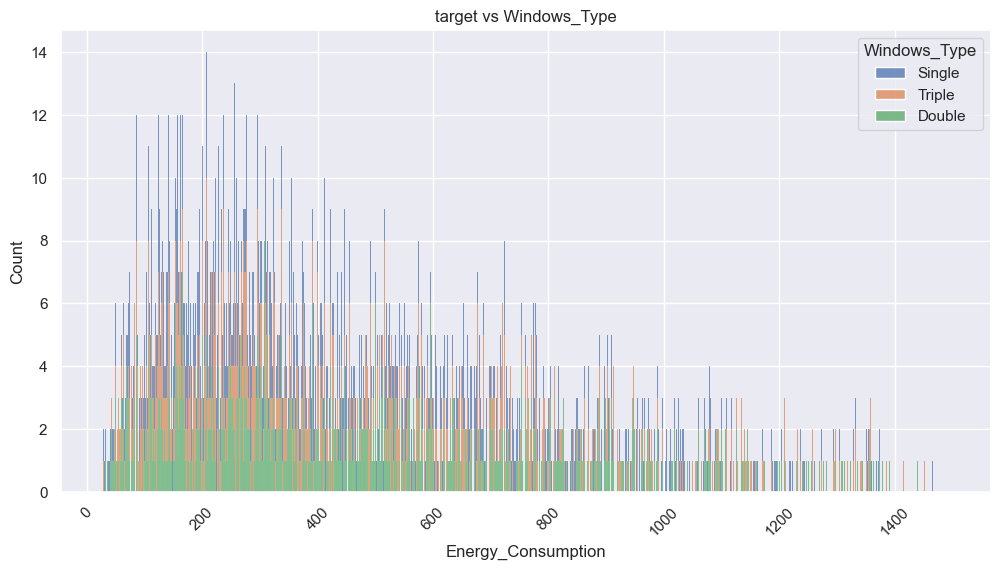

In [14]:
for col in categ_columns:
    show_hist_plot(col)

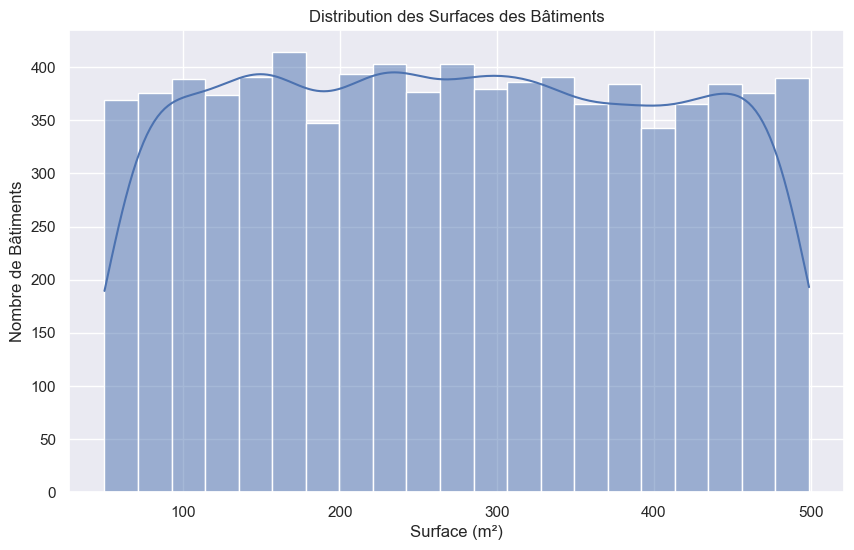

In [15]:

# Histogramme des surfaces des bâtiments
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Surface'], kde=True)
plt.title('Distribution des Surfaces des Bâtiments')
plt.xlabel('Surface (m²)')
plt.ylabel('Nombre de Bâtiments')
plt.show()


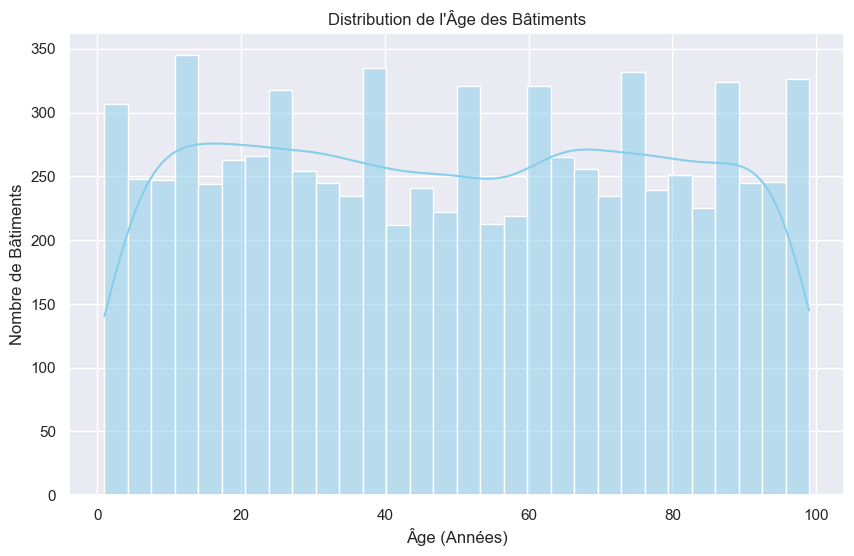

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution de l'âge des bâtiments
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Age'], bins=30, kde=True, color='skyblue')
plt.title('Distribution de l\'Âge des Bâtiments')
plt.xlabel('Âge (Années)')
plt.ylabel('Nombre de Bâtiments')
plt.show()

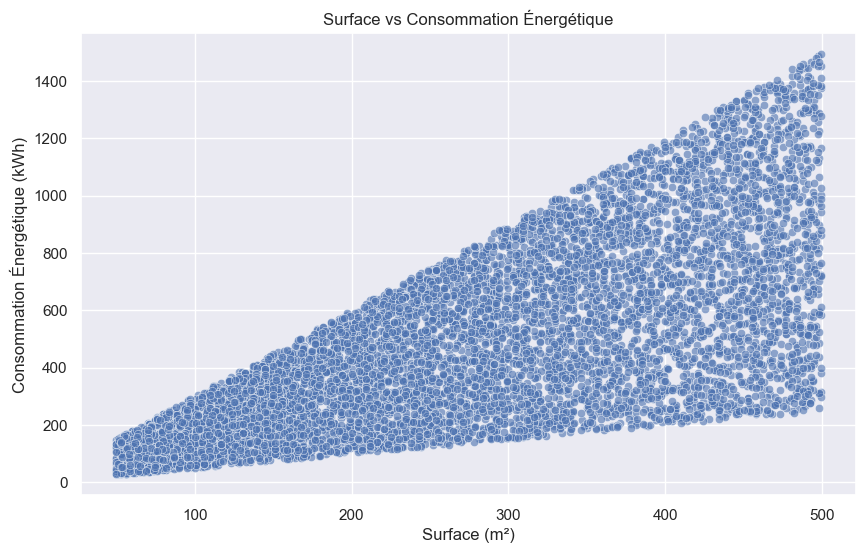

In [17]:


# Relation entre la surface et la consommation énergétique
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Surface', y='Energy_Consumption', data=train_data, alpha=0.6)
plt.title('Surface vs Consommation Énergétique')
plt.xlabel('Surface (m²)')
plt.ylabel('Consommation Énergétique (kWh)')
plt.show()

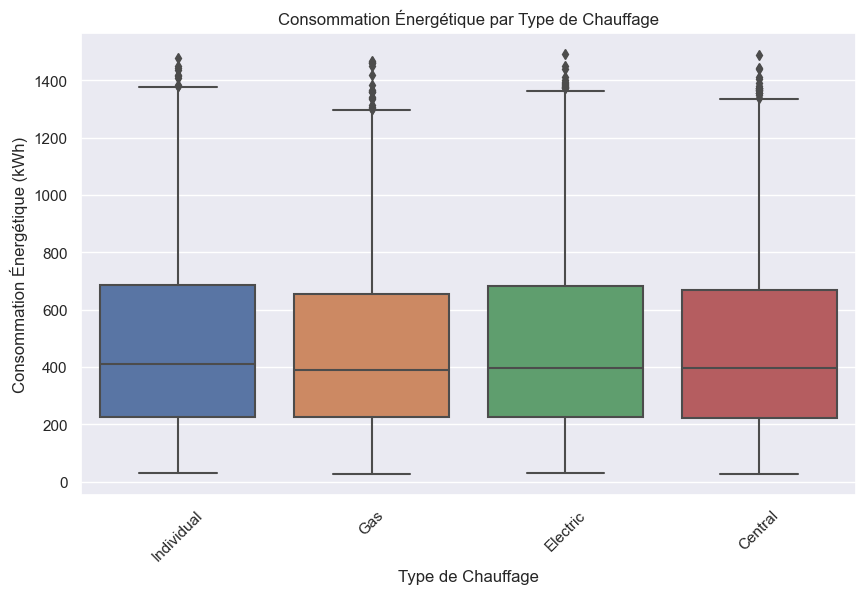

In [18]:
# Comparaison de la consommation énergétique selon le type de chauffage
plt.figure(figsize=(10, 6))
sns.boxplot(x='Heating_Type', y='Energy_Consumption', data=train_data)
plt.title('Consommation Énergétique par Type de Chauffage')
plt.xlabel('Type de Chauffage')
plt.ylabel('Consommation Énergétique (kWh)')
plt.xticks(rotation=45)
plt.show()

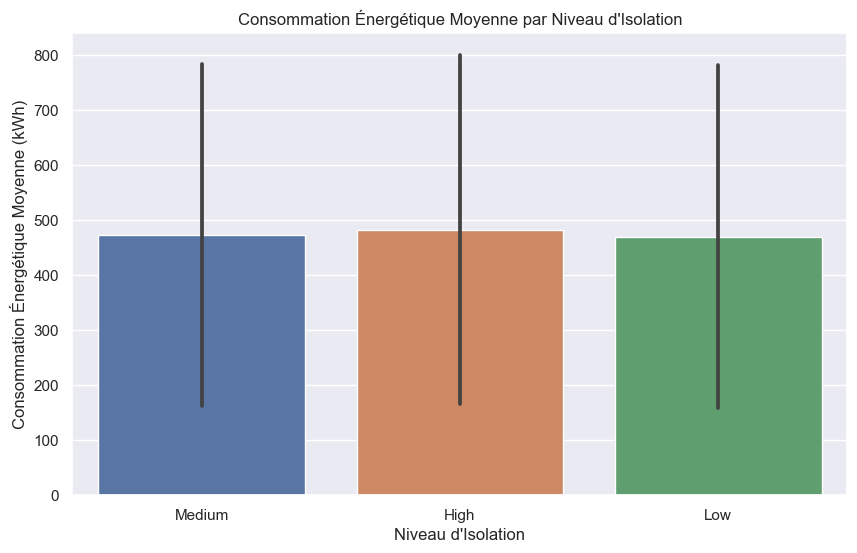

In [19]:
# Impact de l'isolation sur la consommation énergétique
plt.figure(figsize=(10, 6))
sns.barplot(x='Insulation_Level', y='Energy_Consumption', data=train_data, estimator=np.mean, ci='sd')
plt.title('Consommation Énergétique Moyenne par Niveau d\'Isolation')
plt.xlabel('Niveau d\'Isolation')
plt.ylabel('Consommation Énergétique Moyenne (kWh)')
plt.show()

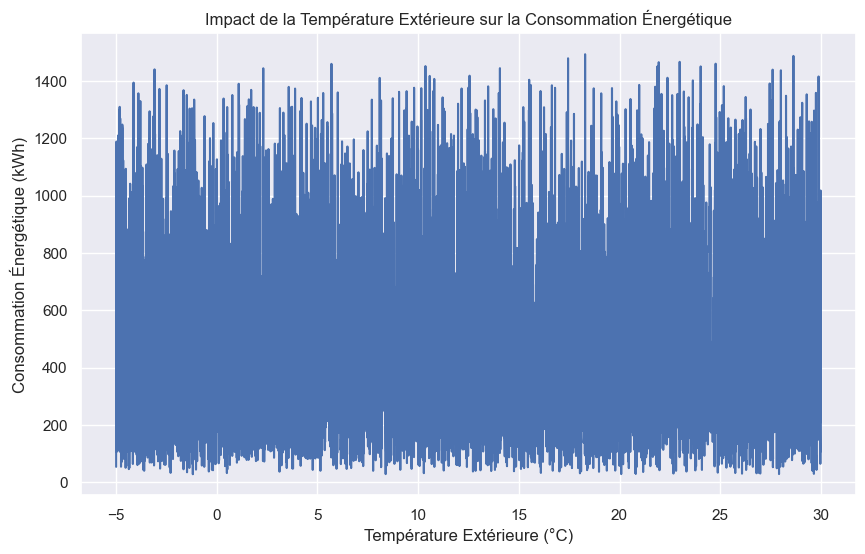

In [20]:
# Température extérieure vs consommation énergétique
plt.figure(figsize=(10, 6))
sns.lineplot(x='Outside_Temperature', y='Energy_Consumption', data=train_data, ci=None)
plt.title('Impact de la Température Extérieure sur la Consommation Énergétique')
plt.xlabel('Température Extérieure (°C)')
plt.ylabel('Consommation Énergétique (kWh)')
plt.show()


# Base Model

## Split data 


In [21]:
X_train = train_data.drop(columns=['Energy_Consumption'])
y_train = train_data['Energy_Consumption']


In [22]:
X_test = test_data.drop(columns=['Energy_Consumption'])
y_test = test_data['Energy_Consumption']


## Preprocessing

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Définition des pipelines de prétraitement pour les variables numériques et catégoriques
numeric_features = ['Surface', 'Age', 'Outside_Temperature']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Type', 'Heating_Type', 'Insulation_Level', 'Windows_Type']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinaison des pipelines de prétraitement dans un transformateur par colonne
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Application du prétraitement sur les données d'entraînement
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)



## Model train

In [24]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [25]:
# Prétraitement et modélisation (exemple avec RandomForestRegressor)
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Entraînement du modèle
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Évaluation du modèle
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
rmse2 = mean_absolute_error(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R²: {r2}')
print(f'R²: {rmse2}')

RMSE: 227.1539486624336
R²: 0.4793965941976148
R²: 176.80441853906075


# Submitting to the online challenge: [ramp.studio](https://ramp.studio) <a class="anchor" id="submitting"></a>

Once you found a good model, you can submit them to [ramp.studio](https://www.ramp.studio) to enter the online challenge. First, if it is your first time using the RAMP platform, [sign up](https://www.ramp.studio/sign_up), otherwise [log in](https://www.ramp.studio/login). Then sign up to the event [energy consumption](http://www.ramp.studio/events/energy_cosumption). Both signups are controled by RAMP administrators, so there **can be a delay between asking for signup and being able to submit**.

Once your signup request is accepted, you can go to your [sandbox](https://www.ramp.studio/events/energy_cosumption/sandbox) and copy-paste. You can also create a new folder `my_submission` in the `submissions` folder containing `classifier.py` and upload this file directly. You can check the starting-kit ([`regressor.py`](/edit/submissions/starting_kit/regressor.py)) for an example. The submission is trained and tested on our backend in the similar way as `ramp-test` does it locally. While your submission is waiting in the queue and being trained, you can find it in the "New submissions (pending training)" table in [my submissions](https://www.ramp.studio/events/energy_cosumption/my_submissions). Once it is trained, your submission shows up on the [public leaderboard](https://www.ramp.studio/events/energy_cosumption/leaderboard). 
If there is an error (despite having tested your submission locally with `ramp-test`), it will show up in the "Failed submissions" table in [my submissions](https://www.ramp.studio/events/energy_cosumption/my_submissions). You can click on the error to see part of the trace.

The data set we use at the backend is usually different from what you find in the starting kit, so the score may be different.

The usual way to work with RAMP is to explore solutions, add feature transformations, select models, etc., _locally_, and checking them with `ramp-test`. The script prints mean cross-validation scores.

The official score in this RAMP (the first score column on the [leaderboard](http://www.ramp.studio/events/energy_cosumption/leaderboard)) is the balenced accuracy score (`r2_score`). When the score is good enough, you can submit it at the RAMP.

Here is the script proposed as the starting_kit:

In [26]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression



In [27]:

class Regressor(BaseEstimator):
    def __init__(self):
        # Specify the categorical columns
        categorical_cols = ['Type', 'Heating_Type',
                            'Insulation_Level', 'Windows_Type']
        num_columns = ['Surface', 'Age', 'Outside_Temperature']

        # Pipeline pour les variables numériques
        self.numeric_transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="median")),  # Imputation des valeurs manquantes par la médiane
                ("scaler", StandardScaler())  # Standardisation des variables numériques
            ]
        )

        # Pipeline pour les variables catégoriques
        self.categorical_transformer = Pipeline(
            steps=[
                ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),  # Imputation des valeurs manquantes par une constante
                ("onehot", OneHotEncoder(handle_unknown="ignore"))  # Encodage OneHot pour les variables catégoriques
            ]
        )

        # Combine les transformateurs
        self.preprocessor = ColumnTransformer(
            transformers=[
                ("num", self.numeric_transformer, num_columns),  # Applique numeric_transformer aux variables numériques
                ("cat", self.categorical_transformer, categorical_cols)  # Applique categorical_transformer aux variables catégoriques
            ]
        )
                
        self.model = LinearRegression()
        self.pipe = make_pipeline(self.preprocessor, self.model)

    def fit(self, X, y):
        self.pipe.fit(X, y)

    def predict(self, X):
        return self.pipe.predict(X)

    def predict_proba(self, X):
        return self.pipe.predict_proba(X)



You can test your solution locally by running the ramp-test command followed by --submission <my_submission folder>.
Here is an example with the starting_kit submission:

In [28]:
!ramp-test --submission starting_kit

/Users/amadoutraore/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
Testing Prediction of the energy consumption of buildings
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
	score    rmse  rel_rmse  Nrmse      time
	train  221.49      0.74  0.702  0.049377
	valid  215.52      0.75  0.708  0.015845
	test   220.72      0.73  0.701  0.001979
CV fold 1
	score    rmse  rel_rmse  Nrmse      time
	train  222.15      0.75  0.705  0.033446
	valid  212.64      0.71  0.696  0.019345
	test   220.24      0.72  0.700  0.008984
----------------------------
Mean CV scores
----------------------------
	score            rmse      rel_rmse           Nrmse        time
	train  221.82 ± 0.331  0.74 ± 0.003  0.704 ± 0.0013  0.0 ± 0.01
	valid  214.08 ± 1.438   0.73 ± 0.02  0.702 ± 0.0058   

## More information

See the [online documentation](https://paris-saclay-cds.github.io/ramp-docs/ramp-workflow/stable/using_kits.html) for more details.

## Questions

Questions related to the starting kit should be asked on the [issue tracker](https://github.com/ramp-kits/tephra/issues).